The purpose of this Python script is to intrepret a BED graph and generate plots of genome coverage, and specific gene coverage. This will get extended to compare coverage between more than one gene or more than one sample, and eventually, to incorporate variant calling

The input bed file for this notebook was generated with bedtools on the command line like this:

`bedtools genomecov -bga -ibam 8777.3.112209.CCTTAG_NZ_CP033381.1.sorted.bam > 8777.3.112209.CCTTAG_NZ_CP033381.1.depth.bed`

In [58]:
# imports

import math
import pybedtools
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# create bedtool objects

depth_bed = pybedtools.BedTool('../scratchspace/8777.3.112209.CCTTAG_NZ_CP033381.1.depth.bed')
annot_bed = pybedtools.BedTool('../scratchspace/NZ_CP033381.1.gff')

In [4]:
# look at depth_bed interval objects

for interval in depth_bed[0:12]:
    print(interval.start, interval.stop, interval.name)

0 2154 0
2154 2259 1
2259 3887 0
3887 3976 1
3976 4544 0
4544 4547 11
4547 4548 15
4548 4549 20
4549 4550 27
4550 4551 439
4551 4552 446
4552 4553 447


In [5]:
# fun with intervals and gene lengths

for interval in annot_bed[9640:]:
    print(interval.start, interval.stop, interval.stop - interval.start)

5229227 5229497 270
5229477 5229750 273
5229477 5229750 273
5229926 5230445 519
5229926 5230445 519
5230574 5230823 249
5230574 5230823 249
5230899 5232186 1287
5230899 5232186 1287
5232329 5232770 441
5232329 5232770 441
5232787 5233402 615
5232787 5233402 615


In [6]:
# function to plot genome coverage from bedfile

def plot_depth_coverage(region):
    begin = region[0].start
    bases = []
    coverage = []

    for interval in region:
        start = interval.start - begin + 0.1    # offset coordinates to convert to floats
        stop = interval.stop - begin - 0.1    # and to prevent two depths at the same coordinate
        depth = float(interval.name)
        bases.extend([start, stop])    # add both start and stop to the list of positions
        coverage.extend([depth, depth])    # add depths for both start and stop coordinates

    fig, axis = plt.subplots(figsize=(16, 4))
    sns.lineplot(x=bases, y=coverage, ax=axis)
    
    return axis

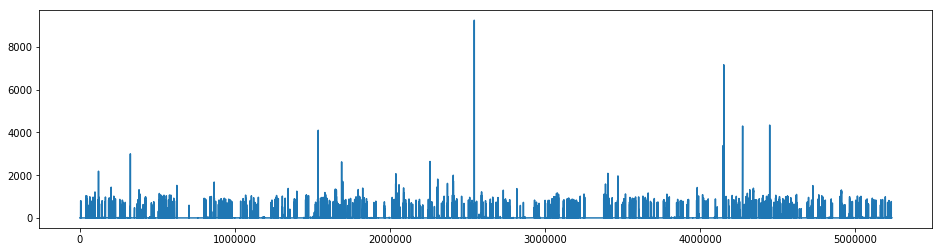

In [7]:
# plot genome coverage of entire genome

plot_depth_coverage(depth_bed)

In [8]:
# check hisD gene (hisD gene: 4723086..4724387)
# check trpB gene (trpB gene: 2749668..2750870)

hisD = pybedtools.BedTool('NZ_CP033381.1 4723086 4724387 hisD', from_string=True)
trpB = pybedtools.BedTool('NZ_CP033381.1 2749668 2750870 trpB', from_string=True)

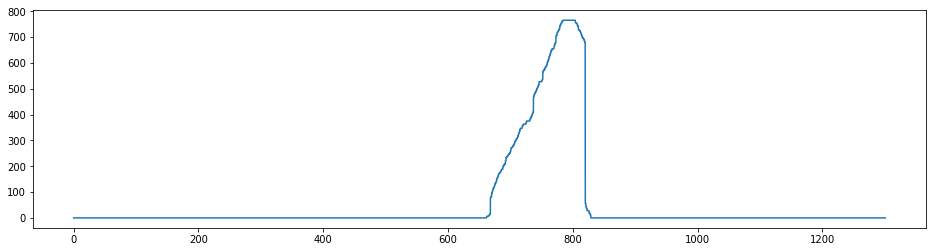

In [9]:
# get hisD coverage

hisD_coverage = depth_bed.intersect(hisD)
plot_depth_coverage(hisD_coverage)

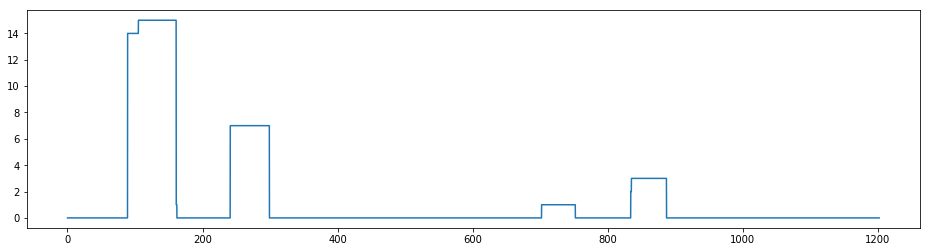

In [10]:
# get trpB coverage

trpB_coverage = depth_bed.intersect(trpB)
plot_depth_coverage(trpB_coverage)

## Visualizing sequence variants

In [11]:
!ls ../scratchspace/8777.3.112209.CCTTAG_NZ_CP033381.1.vcf

../scratchspace/8777.3.112209.CCTTAG_NZ_CP033381.1.vcf


In [12]:
variant_bed = pybedtools.BedTool('../scratchspace/8777.3.112209.CCTTAG_NZ_CP033381.1.vcf')

In [17]:
counter = 0

while counter < 20:
    for interval in variant_bed:
        print(interval)
        counter += 1

NZ_CP033381.1	4547	.	C	T	159.006	.	DP=11;VDB=6.99472e-07;SGB=-0.670168;MQSB=0.857112;MQ0F=0;AF1=1;AC1=1;DP4=0,0,5,5;MQ=50;FQ=-999	GT:PL	1:189,0

NZ_CP033381.1	4550	.	C	A	225.007	.	DP=27;VDB=1.74583e-09;SGB=-0.688148;MQSB=0.511891;MQ0F=0;AF1=1;AC1=1;DP4=0,0,8,7;MQ=50;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	4565	.	A	C	225.007	.	DP=260;VDB=0;SGB=-0.693147;MQSB=0.711303;MQ0F=0;AF1=1;AC1=1;DP4=0,0,248,12;MQ=49;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	4568	.	G	A	225.007	.	DP=261;VDB=0;SGB=-0.693147;MQSB=0.722354;MQ0F=0;AF1=1;AC1=1;DP4=0,0,249,12;MQ=49;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	4571	.	G	C	225.007	.	DP=264;VDB=0;SGB=-0.693147;RPB=1;MQB=1;MQSB=0.743924;BQB=1;MQ0F=0;AF1=1;AC1=1;DP4=1,0,250,12;MQ=49;FQ=-999;PV4=1,1,1,0.392526	GT:PL	1:255,0

NZ_CP033381.1	4580	.	G	A	225.007	.	DP=272;VDB=0;SGB=-0.693147;MQSB=0.639987;MQ0F=0;AF1=1;AC1=1;DP4=0,0,258,13;MQ=49;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	4586	.	A	G	225.007	.	DP=279;VDB=0;SGB=-0.693147;MQSB=0.733498;MQ0F=0;AF1=1;AC1=1;DP4=0,0,264,13;MQ=49;F

NZ_CP033381.1	214558	.	A	G	8.64278	.	DP=1;SGB=-0.379885;MQ0F=0;AF1=1;AC1=1;DP4=0,0,0,1;MQ=45;FQ=-999	GT:PL	1:38,0

NZ_CP033381.1	214564	.	T	G	8.64278	.	DP=1;SGB=-0.379885;MQ0F=0;AF1=1;AC1=1;DP4=0,0,0,1;MQ=45;FQ=-999	GT:PL	1:38,0

NZ_CP033381.1	216352	.	G	T	4.12714	.	DP=2;SGB=-0.379885;MQ0F=0;AF1=1;AC1=1;DP4=0,0,0,1;MQ=32;FQ=-999	GT:PL	1:32,0

NZ_CP033381.1	216361	.	G	A	52.005	.	DP=3;VDB=0.0506481;SGB=-0.511536;MQSB=1;MQ0F=0;AF1=1;AC1=1;DP4=0,0,2,1;MQ=38;FQ=-999	GT:PL	1:82,0

NZ_CP033381.1	216364	.	G	T,C	30.0091	.	DP=3;VDB=0.045681;SGB=-0.511536;MQSB=1;MQ0F=0;AF1=1;AC1=1;DP4=0,0,2,1;MQ=38;FQ=-999	GT:PL	1:73,13,56

NZ_CP033381.1	216370	.	G	A	225.007	.	DP=25;VDB=3.48655e-13;SGB=-0.692831;MQSB=0.919431;MQ0F=0;AF1=1;AC1=1;DP4=0,0,10,14;MQ=37;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	216382	.	A	G	225.007	.	DP=27;VDB=5.53891e-12;SGB=-0.692914;RPB=0;MQB=0.96;MQSB=0.906087;BQB=0.8;MQ0F=0;AF1=1;AC1=1;DP4=1,1,10,15;MQ=38;FQ=-999;PV4=1,0.323671,1,0.247323	GT:PL	1:255,0

NZ_CP033381.1	216385	.	G	A	225.0

NZ_CP033381.1	452909	.	G	A	225.007	.	DP=19;VDB=1.02273e-07;SGB=-0.69168;MQSB=0.198623;MQ0F=0;AF1=1;AC1=1;DP4=0,0,13,6;MQ=40;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	452910	.	A	G	225.007	.	DP=19;VDB=1.3933e-07;SGB=-0.69168;MQSB=0.198623;MQ0F=0;AF1=1;AC1=1;DP4=0,0,13,6;MQ=40;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	452916	.	G	A	39.0054	.	DP=28;VDB=5.16705e-07;SGB=-0.69168;RPB=0.000144125;MQB=0.00955264;MQSB=0.852133;BQB=0.985288;MQ0F=0;AF1=0.5;AC1=1;DP4=6,3,13,6;MQ=45;FQ=-999;PV4=1,0.494945,0.00160047,1	GT:PL	1:245,176

NZ_CP033381.1	452922	.	G	A	69.0052	.	DP=29;VDB=7.79368e-07;SGB=-0.692352;RPB=0.00374995;MQB=0.0082273;MQSB=0.900088;BQB=0.992587;MQ0F=0;AF1=0.5;AC1=1;DP4=5,3,14,7;MQ=46;FQ=-999;PV4=1,0.429396,0.00253418,0.32886	GT:PL	1:255,156

NZ_CP033381.1	452925	.	G	C	225.007	.	DP=30;VDB=0.000566304;SGB=-0.693097;MQSB=0.838307;MQ0F=0;AF1=1;AC1=1;DP4=0,0,20,10;MQ=46;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	452945	.	G	A	225.007	.	DP=36;VDB=0.0557592;SGB=-0.693139;MQSB=0.693411;MQ0F=0;AF1=1;AC1=1;DP4

NZ_CP033381.1	605162	.	G	C	32.0075	.	DP=2;VDB=0.1;SGB=-0.453602;MQ0F=0;AF1=1;AC1=1;DP4=0,0,0,2;MQ=34;FQ=-999	GT:PL	1:62,0

NZ_CP033381.1	605163	.	T	G	32.0075	.	DP=2;VDB=0.1;SGB=-0.453602;MQ0F=0;AF1=1;AC1=1;DP4=0,0,0,2;MQ=34;FQ=-999	GT:PL	1:62,0

NZ_CP033381.1	605167	.	G	A	32.0075	.	DP=2;VDB=0.1;SGB=-0.453602;MQ0F=0;AF1=1;AC1=1;DP4=0,0,0,2;MQ=34;FQ=-999	GT:PL	1:62,0

NZ_CP033381.1	605169	.	A	C	32.0075	.	DP=2;VDB=0.1;SGB=-0.453602;MQ0F=0;AF1=1;AC1=1;DP4=0,0,0,2;MQ=34;FQ=-999	GT:PL	1:62,0

NZ_CP033381.1	605172	.	G	A	130.006	.	DP=23;VDB=0.316268;SGB=-0.676189;MQSB=0.263597;MQ0F=0;AF1=1;AC1=1;DP4=0,0,8,3;MQ=56;FQ=-999	GT:PL	1:160,0

NZ_CP033381.1	605181	.	C	T	225.007	.	DP=258;VDB=0;SGB=-0.693147;MQSB=0.755207;MQ0F=0;AF1=1;AC1=1;DP4=0,0,246,10;MQ=59;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	605207	.	T	A	225.007	.	DP=277;VDB=0;SGB=-0.693147;RPB=0.00025554;MQB=4.92985e-08;MQSB=0.884715;BQB=0.702706;MQ0F=0;AF1=1;AC1=1;DP4=12,0,256,9;MQ=59;FQ=-999;PV4=1,0.173606,1,0.093371	GT:PL	1:255,0

NZ_CP033381.


NZ_CP033381.1	914307	.	T	G	225.007	.	DP=251;VDB=0;SGB=-0.693147;MQSB=0.956721;MQ0F=0;AF1=1;AC1=1;DP4=0,0,145,106;MQ=20;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	914317	.	G	A	225.007	.	DP=251;VDB=0;SGB=-0.693147;MQSB=0.956721;MQ0F=0;AF1=1;AC1=1;DP4=0,0,145,106;MQ=20;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	914323	.	C	G	224.007	.	DP=251;VDB=0;SGB=-0.693147;MQSB=0.978249;MQ0F=0;AF1=1;AC1=1;DP4=0,0,144,106;MQ=20;FQ=-999	GT:PL	1:254,0

NZ_CP033381.1	914331	.	T	A	224.007	.	DP=251;VDB=0;SGB=-0.693147;MQSB=0.990656;MQ0F=0;AF1=1;AC1=1;DP4=0,0,143,106;MQ=20;FQ=-999	GT:PL	1:254,0

NZ_CP033381.1	914332	.	C	T	214.007	.	DP=251;VDB=0;SGB=-0.693147;RPB=0.218806;MQB=0.708373;MQSB=0.990656;BQB=0.998853;MQ0F=0;AF1=1;AC1=1;DP4=5,2,138,104;MQ=20;FQ=-999;PV4=0.702064,0.272209,1,1	GT:PL	1:244,0

NZ_CP033381.1	914344	.	T	C	223.007	.	DP=251;VDB=0;SGB=-0.693147;RPB=1;MQB=1;MQSB=0.990656;BQB=1;MQ0F=0;AF1=1;AC1=1;DP4=1,0,142,106;MQ=20;FQ=-999;PV4=1,0.398853,1,0.268517	GT:PL	1:253,0

NZ_CP033381.1	914362	.	C	T	64.0052	.	D

NZ_CP033381.1	1068647	.	C	T	225.007	.	DP=222;VDB=0;SGB=-0.693147;MQSB=0.399518;MQ0F=0;AF1=1;AC1=1;DP4=0,0,162,58;MQ=53;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	1069859	.	C	T	3.54149	.	DP=1;SGB=-0.379885;MQ0F=0;AF1=1;AC1=1;DP4=0,0,1,0;MQ=54;FQ=-999	GT:PL	1:31,0

NZ_CP033381.1	1070537	.	A	T	24.0219	.	DP=4;VDB=0.00872848;SGB=-0.556411;MQSB=1;MQ0F=0;AF1=1;AC1=1;DP4=0,0,2,2;MQ=15;FQ=-999	GT:PL	1:54,0

NZ_CP033381.1	1070540	.	G	C	24.0219	.	DP=4;VDB=0.00872848;SGB=-0.556411;MQSB=1;MQ0F=0;AF1=1;AC1=1;DP4=0,0,2,2;MQ=15;FQ=-999	GT:PL	1:54,0

NZ_CP033381.1	1070543	.	A	G	24.0219	.	DP=4;VDB=0.00872848;SGB=-0.556411;MQSB=1;MQ0F=0;AF1=1;AC1=1;DP4=0,0,2,2;MQ=15;FQ=-999	GT:PL	1:54,0

NZ_CP033381.1	1070546	.	C	T	24.0219	.	DP=4;VDB=0.00872848;SGB=-0.556411;MQSB=1;MQ0F=0;AF1=1;AC1=1;DP4=0,0,2,2;MQ=15;FQ=-999	GT:PL	1:54,0

NZ_CP033381.1	1070558	.	G	C	59.0051	.	DP=7;VDB=0.00291033;SGB=-0.636426;MQSB=1.01283;MQ0F=0;AF1=1;AC1=1;DP4=0,0,3,4;MQ=16;FQ=-999	GT:PL	1:89,0

NZ_CP033381.1	1070564	.	G	C	59.0051	.	DP=7;VDB


NZ_CP033381.1	1264779	.	T	C	4.7673	.	DP=1;SGB=-0.379885;MQ0F=0;AF1=1;AC1=1;DP4=0,0,1,0;MQ=33;FQ=-999	GT:PL	1:33,0

NZ_CP033381.1	1264784	.	G	A	4.7673	.	DP=1;SGB=-0.379885;MQ0F=0;AF1=1;AC1=1;DP4=0,0,1,0;MQ=33;FQ=-999	GT:PL	1:33,0

NZ_CP033381.1	1264790	.	G	C	4.7673	.	DP=1;SGB=-0.379885;MQ0F=0;AF1=1;AC1=1;DP4=0,0,1,0;MQ=33;FQ=-999	GT:PL	1:33,0

NZ_CP033381.1	1264793	.	T	C	4.7673	.	DP=1;SGB=-0.379885;MQ0F=0;AF1=1;AC1=1;DP4=0,0,1,0;MQ=33;FQ=-999	GT:PL	1:33,0

NZ_CP033381.1	1264808	.	T	C	4.7673	.	DP=1;SGB=-0.379885;MQ0F=0;AF1=1;AC1=1;DP4=0,0,1,0;MQ=33;FQ=-999	GT:PL	1:33,0

NZ_CP033381.1	1264814	.	A	G	4.7673	.	DP=1;SGB=-0.379885;MQ0F=0;AF1=1;AC1=1;DP4=0,0,1,0;MQ=33;FQ=-999	GT:PL	1:33,0

NZ_CP033381.1	1264820	.	T	C	4.7673	.	DP=1;SGB=-0.379885;MQ0F=0;AF1=1;AC1=1;DP4=0,0,1,0;MQ=33;FQ=-999	GT:PL	1:33,0

NZ_CP033381.1	1264827	.	T	C	4.7673	.	DP=1;SGB=-0.379885;MQ0F=0;AF1=1;AC1=1;DP4=0,0,1,0;MQ=33;FQ=-999	GT:PL	1:33,0

NZ_CP033381.1	1264838	.	T	C	4.7673	.	DP=1;SGB=-0.379885;MQ0F=0;AF1=1;AC1=1;DP4=

NZ_CP033381.1	1444361	.	T	A	8.64278	.	DP=1;SGB=-0.379885;MQ0F=0;AF1=1;AC1=1;DP4=0,0,1,0;MQ=60;FQ=-999	GT:PL	1:38,0

NZ_CP033381.1	1444367	.	A	T	8.64278	.	DP=1;SGB=-0.379885;MQ0F=0;AF1=1;AC1=1;DP4=0,0,1,0;MQ=60;FQ=-999	GT:PL	1:38,0

NZ_CP033381.1	1444382	.	T	C	8.64278	.	DP=1;SGB=-0.379885;MQ0F=0;AF1=1;AC1=1;DP4=0,0,1,0;MQ=60;FQ=-999	GT:PL	1:38,0

NZ_CP033381.1	1444388	.	G	A	8.64278	.	DP=1;SGB=-0.379885;MQ0F=0;AF1=1;AC1=1;DP4=0,0,1,0;MQ=60;FQ=-999	GT:PL	1:38,0

NZ_CP033381.1	1444400	.	C	T	8.64278	.	DP=1;SGB=-0.379885;MQ0F=0;AF1=1;AC1=1;DP4=0,0,1,0;MQ=60;FQ=-999	GT:PL	1:38,0

NZ_CP033381.1	1444424	.	A	G	8.64278	.	DP=1;SGB=-0.379885;MQ0F=0;AF1=1;AC1=1;DP4=0,0,1,0;MQ=60;FQ=-999	GT:PL	1:38,0

NZ_CP033381.1	1444427	.	C	A	8.64278	.	DP=1;SGB=-0.379885;MQ0F=0;AF1=1;AC1=1;DP4=0,0,1,0;MQ=60;FQ=-999	GT:PL	1:38,0

NZ_CP033381.1	1444449	.	C	T	8.64278	.	DP=1;SGB=-0.379885;MQ0F=0;AF1=1;AC1=1;DP4=0,0,1,0;MQ=60;FQ=-999	GT:PL	1:38,0

NZ_CP033381.1	1444466	.	C	A	8.64278	.	DP=1;SGB=-0.379885;MQ0F=0;AF1=1;AC

NZ_CP033381.1	1487964	.	T	C	201.007	.	DP=21;VDB=0.0879635;SGB=-0.692067;MQSB=0.832887;MQ0F=0;AF1=1;AC1=1;DP4=0,0,10,10;MQ=24;FQ=-999	GT:PL	1:231,0

NZ_CP033381.1	1487967	.	A	G	200.007	.	DP=22;VDB=0.0983211;SGB=-0.692067;MQSB=0.832887;MQ0F=0;AF1=1;AC1=1;DP4=0,0,10,10;MQ=24;FQ=-999	GT:PL	1:230,0

NZ_CP033381.1	1487991	.	C	A	224.007	.	DP=27;VDB=0.476666;SGB=-0.693021;MQSB=0.765017;MQ0F=0;AF1=1;AC1=1;DP4=0,0,15,12;MQ=25;FQ=-999	GT:PL	1:254,0

NZ_CP033381.1	1488000	.	C	A	219.007	.	DP=25;VDB=0.0855429;SGB=-0.692831;MQSB=0.885805;MQ0F=0;AF1=1;AC1=1;DP4=0,0,13,11;MQ=25;FQ=-999	GT:PL	1:249,0

NZ_CP033381.1	1488003	.	T	C	219.007	.	DP=24;VDB=0.100837;SGB=-0.692831;MQSB=0.885805;MQ0F=0;AF1=1;AC1=1;DP4=0,0,13,11;MQ=25;FQ=-999	GT:PL	1:249,0

NZ_CP033381.1	1488009	.	A	G	214.007	.	DP=24;VDB=0.124202;SGB=-0.692831;MQSB=0.885805;MQ0F=0;AF1=1;AC1=1;DP4=0,0,13,11;MQ=25;FQ=-999	GT:PL	1:244,0

NZ_CP033381.1	1488011	.	C	A	214.007	.	DP=24;VDB=0.12885;SGB=-0.692831;MQSB=0.885805;MQ0F=0;AF1=1;AC1=1;DP4=0,0,13,1

NZ_CP033381.1	1584712	.	A	G	225.007	.	DP=251;VDB=0;SGB=-0.693147;RPB=1;MQB=1;MQSB=0.000492592;BQB=1;MQ0F=0;AF1=1;AC1=1;DP4=0,1,158,91;MQ=25;FQ=-999;PV4=0.368,1,0.319841,1	GT:PL	1:255,0

NZ_CP033381.1	1584713	.	C	T	225.007	.	DP=251;VDB=0;SGB=-0.693147;MQSB=0.000492592;MQ0F=0;AF1=1;AC1=1;DP4=0,0,158,92;MQ=25;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	1584733	.	C	G	225.007	.	DP=201;VDB=0;SGB=-0.693147;MQSB=0.000147537;MQ0F=0;AF1=1;AC1=1;DP4=0,0,126,65;MQ=27;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	1584742	.	A	G	199.007	.	DP=51;VDB=3.18416e-13;SGB=-0.693146;MQSB=0.535498;MQ0F=0;AF1=1;AC1=1;DP4=0,0,21,22;MQ=24;FQ=-999	GT:PL	1:229,0

NZ_CP033381.1	1584745	.	T	C	196.007	.	DP=35;VDB=1.1239e-06;SGB=-0.693054;MQSB=0.33928;MQ0F=0;AF1=1;AC1=1;DP4=0,0,14,14;MQ=24;FQ=-999	GT:PL	1:226,0

NZ_CP033381.1	1584751	.	G	C	115.006	.	DP=15;VDB=0.000368483;SGB=-0.670168;MQSB=0.0916482;MQ0F=0;AF1=1;AC1=1;DP4=0,0,7,3;MQ=24;FQ=-999	GT:PL	1:145,0

NZ_CP033381.1	1584754	.	G	A	105.006	.	DP=9;VDB=0.000321543;SGB=-0.662043;MQSB

NZ_CP033381.1	1741582	.	G	C	19.0589	.	DP=4;VDB=0.0149992;SGB=-0.556411;MQSB=0;MQ0F=0;AF1=1;AC1=1;DP4=0,0,2,2;MQ=14;FQ=-999	GT:PL	1:49,0

NZ_CP033381.1	1741588	.	T	C	19.0589	.	DP=4;VDB=0.0149992;SGB=-0.556411;MQSB=0;MQ0F=0;AF1=1;AC1=1;DP4=0,0,2,2;MQ=14;FQ=-999	GT:PL	1:49,0

NZ_CP033381.1	1741591	.	G	T	19.0589	.	DP=4;VDB=0.0149992;SGB=-0.556411;MQSB=0;MQ0F=0;AF1=1;AC1=1;DP4=0,0,2,2;MQ=14;FQ=-999	GT:PL	1:49,0

NZ_CP033381.1	1741600	.	T	C	19.0589	.	DP=4;VDB=0.0149992;SGB=-0.556411;MQSB=0;MQ0F=0;AF1=1;AC1=1;DP4=0,0,2,2;MQ=14;FQ=-999	GT:PL	1:49,0

NZ_CP033381.1	1741603	.	T	C	19.0589	.	DP=4;VDB=0.0149992;SGB=-0.556411;MQSB=0;MQ0F=0;AF1=1;AC1=1;DP4=0,0,2,2;MQ=14;FQ=-999	GT:PL	1:49,0

NZ_CP033381.1	1741606	.	A	C	19.0589	.	DP=4;VDB=0.0138351;SGB=-0.556411;MQSB=0;MQ0F=0;AF1=1;AC1=1;DP4=0,0,2,2;MQ=14;FQ=-999	GT:PL	1:49,0

NZ_CP033381.1	1741607	.	G	A	19.0589	.	DP=4;VDB=0.0127498;SGB=-0.556411;MQSB=0;MQ0F=0;AF1=1;AC1=1;DP4=0,0,2,2;MQ=14;FQ=-999	GT:PL	1:49,0

NZ_CP033381.1	1741612	.	G	C	19.0589	.	DP=

NZ_CP033381.1	1966293	.	G	T	163.006	.	DP=17;VDB=0.0452912;SGB=-0.690438;MQSB=0.971479;MQ0F=0;AF1=1;AC1=1;DP4=0,0,8,9;MQ=23;FQ=-999	GT:PL	1:193,0

NZ_CP033381.1	1966312	.	T	G	121.006	.	DP=13;VDB=0.00346435;SGB=-0.680642;MQSB=0.95494;MQ0F=0;AF1=1;AC1=1;DP4=0,0,7,5;MQ=20;FQ=-999	GT:PL	1:151,0

NZ_CP033381.1	1966315	.	G	A	111.006	.	DP=13;VDB=0.00288224;SGB=-0.680642;MQSB=0.95494;MQ0F=0;AF1=1;AC1=1;DP4=0,0,7,5;MQ=20;FQ=-999	GT:PL	1:141,0

NZ_CP033381.1	1966318	.	C	T	108.006	.	DP=13;VDB=0.00210526;SGB=-0.680642;MQSB=0.95494;MQ0F=0;AF1=1;AC1=1;DP4=0,0,7,5;MQ=20;FQ=-999	GT:PL	1:138,0

NZ_CP033381.1	1966324	.	A	G	121.006	.	DP=13;VDB=0.0014262;SGB=-0.680642;MQSB=0.95494;MQ0F=0;AF1=1;AC1=1;DP4=0,0,7,5;MQ=20;FQ=-999	GT:PL	1:151,0

NZ_CP033381.1	1966329	.	G	A	121.006	.	DP=13;VDB=0.00109178;SGB=-0.680642;MQSB=0.95494;MQ0F=0;AF1=1;AC1=1;DP4=0,0,7,5;MQ=20;FQ=-999	GT:PL	1:151,0

NZ_CP033381.1	1966339	.	G	C	120.006	.	DP=12;VDB=8.31259e-05;SGB=-0.676189;MQSB=0.950952;MQ0F=0;AF1=1;AC1=1;DP4=0,0,6,5;MQ=21;


NZ_CP033381.1	2146030	.	G	A	225.007	.	DP=22;VDB=1.34537e-08;SGB=-0.692562;MQSB=0.851213;MQ0F=0;AF1=1;AC1=1;DP4=0,0,13,9;MQ=50;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	2146051	.	A	G	225.007	.	DP=23;VDB=1.997e-06;SGB=-0.692717;MQSB=0.722527;MQ0F=0;AF1=1;AC1=1;DP4=0,0,13,10;MQ=51;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	2146057	.	G	A	225.007	.	DP=23;VDB=3.58623e-06;SGB=-0.692717;MQSB=0.722527;MQ0F=0;AF1=1;AC1=1;DP4=0,0,13,10;MQ=51;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	2146060	.	G	T	225.007	.	DP=23;VDB=5.34982e-06;SGB=-0.692717;MQSB=0.722527;MQ0F=0;AF1=1;AC1=1;DP4=0,0,13,10;MQ=51;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	2146061	.	A	T	225.007	.	DP=23;VDB=5.54297e-06;SGB=-0.692717;MQSB=0.722527;MQ0F=0;AF1=1;AC1=1;DP4=0,0,13,10;MQ=51;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	2146062	.	A	G	225.007	.	DP=24;VDB=4.41419e-06;SGB=-0.692562;RPB=0.954545;MQB=0.863636;MQSB=0.598107;BQB=0.636364;MQ0F=0;AF1=1;AC1=1;DP4=1,1,12,10;MQ=51;FQ=-999;PV4=1,1,1,1	GT:PL	1:255,0

NZ_CP033381.1	2146081	.	A	G	225.007	.	DP=32;VDB=0.4

NZ_CP033381.1	2402915	.	T	G	225.007	.	DP=155;VDB=5.55528e-33;SGB=-0.693147;MQSB=0.316641;MQ0F=0;AF1=1;AC1=1;DP4=0,0,148,7;MQ=54;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	2402918	.	T	C	225.007	.	DP=155;VDB=1.65588e-31;SGB=-0.693147;MQSB=0.316641;MQ0F=0;AF1=1;AC1=1;DP4=0,0,148,7;MQ=54;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	2402932	.	G	C	225.007	.	DP=132;VDB=3.9965e-41;SGB=-0.693147;MQSB=0.600283;MQ0F=0;AF1=1;AC1=1;DP4=0,0,114,7;MQ=55;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	2402940	.	A	G	225.007	.	DP=101;VDB=6.70453e-38;SGB=-0.693147;MQSB=0.435068;MQ0F=0;AF1=1;AC1=1;DP4=0,0,93,7;MQ=54;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	2402941	.	G	C	225.007	.	DP=100;VDB=8.23746e-38;SGB=-0.693147;MQSB=0.435068;MQ0F=0;AF1=1;AC1=1;DP4=0,0,93,7;MQ=54;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	2402950	.	G	A	225.007	.	DP=91;VDB=1.47085e-32;SGB=-0.693147;MQSB=0.668049;MQ0F=0;AF1=1;AC1=1;DP4=0,0,77,7;MQ=55;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	2402959	.	G	C	225.007	.	DP=71;VDB=5.99885e-36;SGB=-0.693147;MQSB=0.609799;MQ0F=0;AF1=


NZ_CP033381.1	2537008	.	C	T	225.007	.	DP=274;VDB=0;SGB=-0.693147;MQSB=0.253518;MQ0F=0;AF1=1;AC1=1;DP4=0,0,132,141;MQ=35;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	2537020	.	A	T	225.007	.	DP=275;VDB=0;SGB=-0.693147;MQSB=0.249009;MQ0F=0;AF1=1;AC1=1;DP4=0,0,133,142;MQ=35;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	2537022	.	G	A	225.007	.	DP=275;VDB=0;SGB=-0.693147;MQSB=0.249009;MQ0F=0;AF1=1;AC1=1;DP4=0,0,133,142;MQ=35;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	2537025	.	C	T	225.007	.	DP=277;VDB=0;SGB=-0.693147;RPB=0.308362;MQB=0.254416;MQSB=0.25277;BQB=0.920849;MQ0F=0;AF1=1;AC1=1;DP4=6,4,128,139;MQ=35;FQ=-999;PV4=0.530181,1,1,1	GT:PL	1:255,0

NZ_CP033381.1	2537049	.	G	A	225.007	.	DP=214;VDB=0;SGB=-0.693147;RPB=0.528218;MQB=0.200454;MQSB=0.414028;BQB=0.801257;MQ0F=0;AF1=1;AC1=1;DP4=7,4,99,92;MQ=34;FQ=-999;PV4=0.543133,1,1,0.397431	GT:PL	1:255,0

NZ_CP033381.1	2537052	.	T	C	225.007	.	DP=194;VDB=0;SGB=-0.693147;RPB=0.120605;MQB=0.0624176;MQSB=0.348495;BQB=0.979292;MQ0F=0;AF1=1;AC1=1;DP4=8,3,94,89;MQ=34;FQ=-99

NZ_CP033381.1	2735107	.	A	G	39.0054	.	DP=2;VDB=0.02;SGB=-0.453602;MQ0F=0;AF1=1;AC1=1;DP4=0,0,2,0;MQ=59;FQ=-999	GT:PL	1:69,0

NZ_CP033381.1	2735254	.	C	G	8.64278	.	DP=1;SGB=-0.379885;MQ0F=0;AF1=1;AC1=1;DP4=0,0,1,0;MQ=60;FQ=-999	GT:PL	1:38,0

NZ_CP033381.1	2743988	.	C	T,A	90.0055	.	DP=21;VDB=6.66309e-11;SGB=-0.689466;MQSB=0.96612;MQ0F=0;AF1=1;AC1=1;DP4=0,0,8,8;MQ=43;FQ=-999	GT:PL	1:255,135,193

NZ_CP033381.1	2744012	.	G	A	225.007	.	DP=273;VDB=2.92871e-43;SGB=-0.693147;MQSB=0.0504025;MQ0F=0;AF1=1;AC1=1;DP4=0,0,258,13;MQ=56;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	2744033	.	C	G	225.007	.	DP=254;VDB=8.37785e-26;SGB=-0.693147;RPB=0.997779;MQB=3.50377e-07;MQSB=0.016259;BQB=0.507889;MQ0F=0;AF1=1;AC1=1;DP4=6,6,232,9;MQ=55;FQ=-999;PV4=1.1126e-05,0.101785,1,0.159807	GT:PL	1:255,0

NZ_CP033381.1	2744039	.	C	A	225.007	.	DP=243;VDB=4.176e-33;SGB=-0.693147;MQSB=0.022246;MQ0F=0;AF1=1;AC1=1;DP4=0,0,222,15;MQ=54;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	2744045	.	C	G	225.007	.	DP=233;VDB=4.63269e-36;SGB=-0.69314


NZ_CP033381.1	3000580	.	C	T	6.19669	.	DP=2;VDB=0.68;SGB=-0.453602;MQSB=1;MQ0F=0;AF1=1;AC1=1;DP4=0,0,1,1;MQ=20;FQ=-999	GT:PL	1:35,0

NZ_CP033381.1	3001137	.	T	C	23.0263	.	DP=2;VDB=0.88;SGB=-0.453602;MQ0F=0;AF1=1;AC1=1;DP4=0,0,2,0;MQ=40;FQ=-999	GT:PL	1:53,0

NZ_CP033381.1	3001140	.	C	G	8.64278	.	DP=2;SGB=-0.379885;MQ0F=0;AF1=1;AC1=1;DP4=0,0,1,0;MQ=46;FQ=-999	GT:PL	1:38,0

NZ_CP033381.1	3001155	.	A	C	4.7673	.	DP=1;SGB=-0.379885;MQ0F=0;AF1=1;AC1=1;DP4=0,0,1,0;MQ=46;FQ=-999	GT:PL	1:33,0

NZ_CP033381.1	3001173	.	C	T	8.64278	.	DP=1;SGB=-0.379885;MQ0F=0;AF1=1;AC1=1;DP4=0,0,1,0;MQ=46;FQ=-999	GT:PL	1:38,0

NZ_CP033381.1	3001183	.	A	C	5.45858	.	DP=1;SGB=-0.379885;MQ0F=0;AF1=1;AC1=1;DP4=0,0,1,0;MQ=46;FQ=-999	GT:PL	1:34,0

NZ_CP033381.1	3001254	.	A	G	21.0389	.	DP=2;VDB=0.26;SGB=-0.453602;MQ0F=0;AF1=1;AC1=1;DP4=0,0,2,0;MQ=37;FQ=-999	GT:PL	1:51,0

NZ_CP033381.1	3001309	.	A	G	29.0102	.	DP=3;VDB=0.18;SGB=-0.453602;RPB=1;MQB=1;MQSB=1;BQB=1;MQ0F=0;AF1=0.555409;AC1=1;DP4=1,0,1,1;MQ=42;FQ=-999;PV4=1,1,1,1

NZ_CP033381.1	3193208	.	A	T	225.007	.	DP=122;VDB=4.56747e-23;SGB=-0.693147;MQSB=0.440771;MQ0F=0;AF1=1;AC1=1;DP4=0,0,83,31;MQ=44;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	3193212	.	C	G	225.007	.	DP=114;VDB=2.41463e-22;SGB=-0.693147;MQSB=0.371547;MQ0F=0;AF1=1;AC1=1;DP4=0,0,78,31;MQ=44;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	3193221	.	G	A	225.007	.	DP=29;VDB=0.190987;SGB=-0.692067;MQSB=0.231995;MQ0F=0;AF1=1;AC1=1;DP4=0,0,11,9;MQ=33;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	3193224	.	T	C	225.007	.	DP=19;VDB=0.26737;SGB=-0.69168;MQSB=0.0962474;MQ0F=0;AF1=1;AC1=1;DP4=0,0,10,9;MQ=32;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	3193227	.	A	G	225.007	.	DP=19;VDB=0.313531;SGB=-0.69168;MQSB=0.0962474;MQ0F=0;AF1=1;AC1=1;DP4=0,0,10,9;MQ=32;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	3193229	.	A	G	225.007	.	DP=19;VDB=0.358605;SGB=-0.69168;MQSB=0.0962474;MQ0F=0;AF1=1;AC1=1;DP4=0,0,10,9;MQ=32;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	3193247	.	G	A	26.0156	.	DP=7;VDB=0.109869;SGB=-0.616816;RPB=1;MQB=1;MQSB=1;BQB=1;MQ0F=0;AF1=1;AC1=1;D

NZ_CP033381.1	3546774	.	T	C	225.007	.	DP=243;VDB=4.60895e-08;SGB=-0.693147;MQSB=0.807608;MQ0F=0;AF1=1;AC1=1;DP4=0,0,217,22;MQ=56;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	3546775	.	T	G	225.007	.	DP=247;VDB=3.41192e-08;SGB=-0.693147;MQSB=0.807608;MQ0F=0;AF1=1;AC1=1;DP4=0,0,217,22;MQ=56;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	3546786	.	G	A	225.007	.	DP=201;VDB=1.42049e-06;SGB=-0.693147;MQSB=0.431441;MQ0F=0;AF1=1;AC1=1;DP4=0,0,171,25;MQ=54;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	3546789	.	T	C	225.007	.	DP=195;VDB=2.82206e-07;SGB=-0.693147;RPB=0.0858023;MQB=0.112249;MQSB=0.444861;BQB=0.451727;MQ0F=0;AF1=1;AC1=1;DP4=8,4,161,21;MQ=54;FQ=-999;PV4=0.0521924,1,1,1	GT:PL	1:255,0

NZ_CP033381.1	3546792	.	G	A	225.007	.	DP=193;VDB=8.46629e-08;SGB=-0.693147;MQSB=0.373259;MQ0F=0;AF1=1;AC1=1;DP4=0,0,169,24;MQ=54;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	3546804	.	A	G	225.007	.	DP=162;VDB=4.17077e-17;SGB=-0.693147;RPB=0.903063;MQB=0.298472;MQSB=0.750553;BQB=0.995527;MQ0F=0;AF1=1;AC1=1;DP4=9,1,123,22;MQ=53;FQ=-999;PV4=


NZ_CP033381.1	3727554	.	G	T	225.007	.	DP=271;VDB=0;SGB=-0.693147;MQSB=0.863654;MQ0F=0;AF1=1;AC1=1;DP4=0,0,151,120;MQ=21;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	3727557	.	A	G	225.007	.	DP=274;VDB=0;SGB=-0.693147;MQSB=0.91515;MQ0F=0;AF1=1;AC1=1;DP4=0,0,151,121;MQ=21;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	3727566	.	C	T	225.007	.	DP=279;VDB=0;SGB=-0.693147;MQSB=0.887251;MQ0F=0;AF1=1;AC1=1;DP4=0,0,157,122;MQ=21;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	3727569	.	C	T	225.007	.	DP=280;VDB=0;SGB=-0.693147;MQSB=0.887251;MQ0F=0;AF1=1;AC1=1;DP4=0,0,157,122;MQ=21;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	3727572	.	T	C	225.007	.	DP=283;VDB=0;SGB=-0.693147;MQSB=0.84713;MQ0F=0;AF1=1;AC1=1;DP4=0,0,158,122;MQ=21;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	3727581	.	A	T	225.007	.	DP=292;VDB=0;SGB=-0.693147;MQSB=0.630455;MQ0F=0;AF1=1;AC1=1;DP4=0,0,167,122;MQ=21;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	3727587	.	T	C	225.007	.	DP=298;VDB=1.12104e-43;SGB=-0.693147;MQSB=0.331586;MQ0F=0;AF1=1;AC1=1;DP4=0,0,174,122;MQ=21;FQ=-999	GT:PL


NZ_CP033381.1	3886240	.	T	A	12.27	.	DP=2;VDB=0.02;SGB=-0.453602;MQSB=1;MQ0F=0;AF1=1;AC1=1;DP4=0,0,1,1;MQ=21;FQ=-999	GT:PL	1:42,0

NZ_CP033381.1	3886246	.	G	T	12.27	.	DP=2;VDB=0.02;SGB=-0.453602;MQSB=1;MQ0F=0;AF1=1;AC1=1;DP4=0,0,1,1;MQ=21;FQ=-999	GT:PL	1:42,0

NZ_CP033381.1	3886248	.	C	G	12.27	.	DP=2;VDB=0.02;SGB=-0.453602;MQSB=1;MQ0F=0;AF1=1;AC1=1;DP4=0,0,1,1;MQ=21;FQ=-999	GT:PL	1:42,0

NZ_CP033381.1	3886254	.	C	T	12.27	.	DP=2;VDB=0.02;SGB=-0.453602;MQSB=1;MQ0F=0;AF1=1;AC1=1;DP4=0,0,1,1;MQ=21;FQ=-999	GT:PL	1:42,0

NZ_CP033381.1	3886809	.	C	G	104.006	.	DP=4;VDB=0.0182837;SGB=-0.556411;MQSB=1;MQ0F=0;AF1=1;AC1=1;DP4=0,0,1,3;MQ=49;FQ=-999	GT:PL	1:134,0

NZ_CP033381.1	3886812	.	T	C	104.006	.	DP=4;VDB=0.0182837;SGB=-0.556411;MQSB=1;MQ0F=0;AF1=1;AC1=1;DP4=0,0,1,3;MQ=49;FQ=-999	GT:PL	1:134,0

NZ_CP033381.1	3886818	.	T	G	104.006	.	DP=4;VDB=0.0230159;SGB=-0.556411;MQSB=1;MQ0F=0;AF1=1;AC1=1;DP4=0,0,1,3;MQ=49;FQ=-999	GT:PL	1:134,0

NZ_CP033381.1	3886848	.	A	C	74.0053	.	DP=3;VDB=0.0249187;SGB=-0.5

NZ_CP033381.1	4152362	.	G	A	225.007	.	DP=94;VDB=1.94345e-13;SGB=-0.693147;RPB=1;MQB=1;MQSB=0.026604;BQB=1;MQ0F=0;AF1=1;AC1=1;DP4=1,0,48,44;MQ=53;FQ=-999;PV4=1,0.392567,1,1	GT:PL	1:255,0

NZ_CP033381.1	4152376	.	A	G	225.007	.	DP=85;VDB=8.62323e-14;SGB=-0.693147;MQSB=0.0862413;MQ0F=0;AF1=1;AC1=1;DP4=0,0,39,41;MQ=52;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	4152385	.	G	A	225.007	.	DP=54;VDB=3.35668e-23;SGB=-0.693147;RPB=1;MQB=1;MQSB=0.121084;BQB=1;MQ0F=0;AF1=1;AC1=1;DP4=1,0,23,29;MQ=48;FQ=-999;PV4=0.45283,0.351667,1,0.274047	GT:PL	1:255,0

NZ_CP033381.1	4152389	.	C	T	225.007	.	DP=51;VDB=2.03598e-17;SGB=-0.693147;RPB=1;MQB=1;MQSB=0.109971;BQB=1;MQ0F=0;AF1=1;AC1=1;DP4=1,0,22,28;MQ=48;FQ=-999;PV4=0.45098,0.359052,1,0.257623	GT:PL	1:255,0

NZ_CP033381.1	4152391	.	A	G	225.007	.	DP=50;VDB=8.07598e-17;SGB=-0.693147;MQSB=0.162747;MQ0F=0;AF1=1;AC1=1;DP4=0,0,22,28;MQ=47;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	4152398	.	G	C	225.007	.	DP=42;VDB=3.32339e-16;SGB=-0.693145;RPB=1;MQB=1;MQSB=0.454331;BQB=1;MQ0F=0


NZ_CP033381.1	4363409	.	A	G	13.2167	.	DP=15;VDB=0.02;SGB=-0.453602;MQ0F=0;AF1=1;AC1=1;DP4=0,0,2,0;MQ=54;FQ=-999	GT:PL	1:43,0

NZ_CP033381.1	4363412	.	C	T	3.01251	.	DP=10;SGB=-0.379885;MQ0F=0;AF1=1;AC1=1;DP4=0,0,1,0;MQ=53;FQ=-999	GT:PL	1:30,0

NZ_CP033381.1	4380398	.	A	G	108.006	.	DP=16;VDB=5.52933e-05;SGB=-0.651104;MQSB=1;MQ0F=0;AF1=1;AC1=1;DP4=0,0,6,2;MQ=60;FQ=-999	GT:PL	1:138,0

NZ_CP033381.1	4380439	.	C	T	64.0052	.	DP=9;VDB=0.00558877;SGB=-0.590765;MQ0F=0;AF1=1;AC1=1;DP4=0,0,5,0;MQ=60;FQ=-999	GT:PL	1:94,0

NZ_CP033381.1	4388641	.	A	T	8.64278	.	DP=1;SGB=-0.379885;MQ0F=0;AF1=1;AC1=1;DP4=0,0,1,0;MQ=48;FQ=-999	GT:PL	1:38,0

NZ_CP033381.1	4388644	.	G	A	8.64278	.	DP=1;SGB=-0.379885;MQ0F=0;AF1=1;AC1=1;DP4=0,0,1,0;MQ=48;FQ=-999	GT:PL	1:38,0

NZ_CP033381.1	4388658	.	A	C	6.19669	.	DP=1;SGB=-0.379885;MQ0F=0;AF1=1;AC1=1;DP4=0,0,1,0;MQ=48;FQ=-999	GT:PL	1:35,0

NZ_CP033381.1	4388670	.	C	A	8.64278	.	DP=1;SGB=-0.379885;MQ0F=0;AF1=1;AC1=1;DP4=0,0,1,0;MQ=48;FQ=-999	GT:PL	1:38,0

NZ_CP033381.1	438867

NZ_CP033381.1	4510398	.	C	T	225.007	.	DP=111;VDB=3.54634e-06;SGB=-0.693147;RPB=0.553374;MQB=0.104053;MQSB=0.818421;BQB=0.999481;MQ0F=0;AF1=1;AC1=1;DP4=3,1,97,8;MQ=45;FQ=-999;PV4=0.295156,0.319394,1,1	GT:PL	1:255,0

NZ_CP033381.1	4510404	.	T	C	225.007	.	DP=87;VDB=9.53363e-17;SGB=-0.693147;MQSB=0.81225;MQ0F=0;AF1=1;AC1=1;DP4=0,0,81,6;MQ=40;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	4510407	.	G	C	225.007	.	DP=86;VDB=1.72235e-18;SGB=-0.693147;MQSB=0.817056;MQ0F=0;AF1=1;AC1=1;DP4=0,0,80,6;MQ=40;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	4510408	.	C	A	225.007	.	DP=86;VDB=1.23833e-18;SGB=-0.693147;MQSB=0.817056;MQ0F=0;AF1=1;AC1=1;DP4=0,0,80,6;MQ=40;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	4510413	.	C	T	225.007	.	DP=86;VDB=1.37401e-19;SGB=-0.693147;RPB=0.690476;MQB=0.0238095;MQSB=0.817056;BQB=0.833333;MQ0F=0;AF1=1;AC1=1;DP4=2,0,78,6;MQ=40;FQ=-999;PV4=1,0.35197,1,1	GT:PL	1:255,0

NZ_CP033381.1	4510414	.	A	G	225.007	.	DP=86;VDB=4.71734e-20;SGB=-0.693147;MQSB=0.817056;MQ0F=0;AF1=1;AC1=1;DP4=0,0,80,6;MQ=40;FQ=-99


NZ_CP033381.1	4604602	.	T	C	225.007	.	DP=259;VDB=0;SGB=-0.693147;MQSB=0.9229;MQ0F=0;AF1=1;AC1=1;DP4=0,0,146,113;MQ=25;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	4604603	.	C	A	225.007	.	DP=259;VDB=0;SGB=-0.693147;MQSB=0.9229;MQ0F=0;AF1=1;AC1=1;DP4=0,0,146,113;MQ=25;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	4604609	.	G	A	225.007	.	DP=260;VDB=0;SGB=-0.693147;RPB=1;MQB=1;MQSB=0.954711;BQB=1;MQ0F=0;AF1=1;AC1=1;DP4=1,0,146,113;MQ=25;FQ=-999;PV4=1,0.397281,1,1	GT:PL	1:255,0

NZ_CP033381.1	4604611	.	T	C	225.007	.	DP=260;VDB=0;SGB=-0.693147;MQSB=0.954711;MQ0F=0;AF1=1;AC1=1;DP4=0,0,147,113;MQ=25;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	4604612	.	T	G	225.007	.	DP=260;VDB=0;SGB=-0.693147;MQSB=0.954711;MQ0F=0;AF1=1;AC1=1;DP4=0,0,147,113;MQ=25;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	4604613	.	T	C	225.007	.	DP=260;VDB=0;SGB=-0.693147;MQSB=0.954711;MQ0F=0;AF1=1;AC1=1;DP4=0,0,147,113;MQ=25;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	4604616	.	A	G	225.007	.	DP=260;VDB=0;SGB=-0.693147;MQSB=0.954711;MQ0F=0;AF1=1;AC1=1;DP4=0,0,14

NZ_CP033381.1	4901608	.	T	A	225.007	.	DP=160;VDB=0.0103895;SGB=-0.693147;MQSB=0.736765;MQ0F=0;AF1=1;AC1=1;DP4=0,0,140,20;MQ=56;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	4901614	.	A	T	225.007	.	DP=143;VDB=0.0183522;SGB=-0.693147;MQSB=0.568965;MQ0F=0;AF1=1;AC1=1;DP4=0,0,125,17;MQ=56;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	4901616	.	G	T	225.007	.	DP=142;VDB=0.0160843;SGB=-0.693147;MQSB=0.568965;MQ0F=0;AF1=1;AC1=1;DP4=0,0,125,17;MQ=56;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	4901623	.	C	T	225.007	.	DP=129;VDB=0.0401578;SGB=-0.693147;RPB=1;MQB=1;MQSB=0.606076;BQB=1;MQ0F=0;AF1=1;AC1=1;DP4=0,1,113,13;MQ=55;FQ=-999;PV4=0.110236,0.393354,0.303021,1	GT:PL	1:255,0

NZ_CP033381.1	4901635	.	G	A	225.007	.	DP=61;VDB=2.74218e-14;SGB=-0.693147;MQSB=0.943396;MQ0F=0;AF1=1;AC1=1;DP4=0,0,53,2;MQ=48;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	4901638	.	A	T	206.007	.	DP=49;VDB=1.67353e-16;SGB=-0.693147;MQSB=1;MQ0F=0;AF1=1;AC1=1;DP4=0,0,48,1;MQ=47;FQ=-999	GT:PL	1:236,0

NZ_CP033381.1	4901640	.	G	T	210.007	.	DP=49;VDB=1.15684e-1


NZ_CP033381.1	5164509	.	A	G	225.007	.	DP=188;VDB=3.79917e-30;SGB=-0.693147;RPB=0.481795;MQB=0.990867;MQSB=0.905986;BQB=0.854671;MQ0F=0;AF1=1;AC1=1;DP4=11,2,160,14;MQ=58;FQ=-999;PV4=0.307383,1,0.418084,1	GT:PL	1:255,0

NZ_CP033381.1	5164512	.	G	A	225.007	.	DP=187;VDB=1.57049e-26;SGB=-0.693147;MQSB=0.905986;MQ0F=0;AF1=1;AC1=1;DP4=0,0,171,16;MQ=58;FQ=-999	GT:PL	1:255,0

NZ_CP033381.1	5164515	.	G	C	225.007	.	DP=187;VDB=1.67945e-25;SGB=-0.693147;RPB=1;MQB=1;MQSB=0.905986;BQB=1;MQ0F=0;AF1=1;AC1=1;DP4=1,0,170,16;MQ=58;FQ=-999;PV4=1,1,0.331532,0.338365	GT:PL	1:255,0

NZ_CP033381.1	5164521	.	A	G	225.007	.	DP=188;VDB=1.78808e-26;SGB=-0.693147;RPB=0.0146622;MQB=0.792173;MQSB=0.997348;BQB=0.991446;MQ0F=0;AF1=1;AC1=1;DP4=11,4,159,14;MQ=58;FQ=-999;PV4=0.0412973,0.213331,0.47454,1	GT:PL	1:255,0

NZ_CP033381.1	5164536	.	A	G	216.007	.	DP=160;VDB=6.94049e-41;SGB=-0.693147;RPB=0.0116962;MQB=0.883088;MQSB=0.971425;BQB=0.833928;MQ0F=0;AF1=1;AC1=1;DP4=10,4,130,14;MQ=57;FQ=-999;PV4=0.0572347,0.144561,0.4001

In [18]:
example_variant = variant_bed[2]

In [27]:
print(example_variant)

NZ_CP033381.1	4565	.	A	C	225.007	.	DP=260;VDB=0;SGB=-0.693147;MQSB=0.711303;MQ0F=0;AF1=1;AC1=1;DP4=0,0,248,12;MQ=49;FQ=-999	GT:PL	1:255,0



In [31]:
field_list = [method for method in dir(example_variant) if not method.startswith('_')] #if not method.startswith('_')

In [34]:
field_list

['append',
 'attrs',
 'chrom',
 'count',
 'deparse_attrs',
 'end',
 'fields',
 'file_type',
 'length',
 'name',
 'o_amt',
 'o_end',
 'o_start',
 'score',
 'start',
 'stop',
 'strand']

In [50]:
example_variant.fields

['NZ_CP033381.1',
 '4565',
 '.',
 'A',
 'C',
 '225.007',
 '.',
 'DP=260;VDB=0;SGB=-0.693147;MQSB=0.711303;MQ0F=0;AF1=1;AC1=1;DP4=0,0,248,12;MQ=49;FQ=-999',
 'GT:PL',
 '1:255,0']

In [51]:
# hisD variants

hisD_var = variant_bed.intersect(hisD)

In [68]:
print(len(hisD_var))

for interval in hisD_var:
    print(float(interval.fields[5]))

20
88.0055
137.006
225.007
225.007
225.007
225.007
225.007
225.007
225.007
225.007
225.007
225.007
225.007
225.007
225.007
225.007
225.007
225.007
225.007
225.007


In [73]:
# function to plot variants in given bedfile

def plot_variants(region, begin, end):
    bases = [0.0]
    p_variant = [0.0]

    for interval in region:
        start = interval.start - begin + 0.1    # offset coordinates to convert to floats
        stop = interval.stop - begin - 0.1    # and to prevent two depths at the same coordinate
        p_value = 1.0 - math.pow(10.0, float(interval[5]) * -0.1)
        bases.extend([start - 0.1, start, stop, stop + 0.1])    # add both start and stop to the list of positions
        p_variant.extend([0.0, p_value, p_value, 0.0])    # add depths for both start and stop coordinates
    bases.append(end - begin)
    p_variant.append(0.0)
    
    fig, axis = plt.subplots(figsize=(16, 4))
    sns.lineplot(x=bases, y=p_variant, ax=axis)
    
    return axis

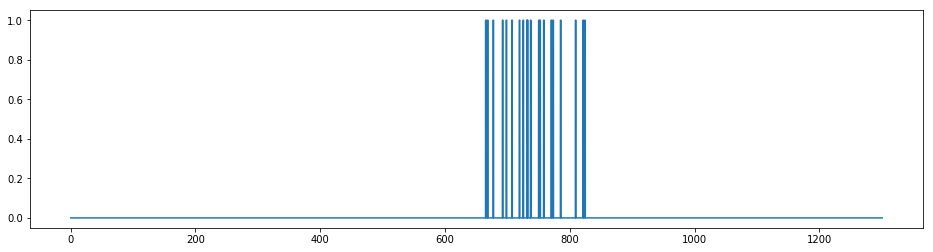

In [74]:
plot_variants(hisD_var, 4723086, 4724387)

# to do next: 
- overlay the two
- do this for multiple samples
    - grid view? stacked?
- multi-sample summary:
    - coverage (% of region w/ @ least x reads)
    - avg coverage depth
    - number of mutant bases
- run each step in environment
- make GNU parallel pipeline
- run GNU parallel pipeline



In [ ]:
def plot_depth_coverage(region):
    begin = region[0].start
    bases = []
    coverage = []

    for interval in region:
        start = interval.start - begin + 0.1    # offset coordinates to convert to floats
        stop = interval.stop - begin - 0.1    # and to prevent two depths at the same coordinate
        depth = float(interval.name)
        bases.extend([start, stop])    # add both start and stop to the list of positions
        coverage.extend([depth, depth])    # add depths for both start and stop coordinates

    fig, axis = plt.subplots(figsize=(16, 4))
    sns.lineplot(x=bases, y=coverage, ax=axis)
    
    return axis